# Drawing shapes with opencv2

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
blank_img = np.zeros(shape=(512, 512, 3), dtype=np.int16)
print(blank_img.shape)

(512, 512, 3)


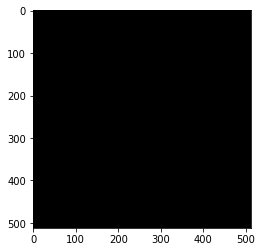

In [4]:
plt.imshow(blank_img)

In [48]:
# Green rect
cv2.rectangle(
    blank_img, 
    pt1=(384, 10), 
    pt2=(500, 100), 
    color=(0, 0, 255), 
    thickness=10
);
# blue sq
cv2.rectangle(
    blank_img, 
    pt1=(200, 200), 
    pt2=(300, 300), 
    color=(0, 255, 0), 
    thickness=10
);
# red circle filled
cv2.circle(
    img=blank_img, 
    center=(100, 100), 
    radius=50, 
    color=(255, 0, 0), 
    thickness=-1
);
# line
cv2.line(
    blank_img, 
    pt1=(0, 0), 
    pt2=(512, 512), 
    color=(0, 255, 255), 
    thickness=5
);
# Text
cv2.putText(
    blank_img, 
    text='Hello', 
    org=(10, 500), 
    fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
    fontScale=2, 
    color=(255, 255, 255), 
    thickness=3
);

# Custom polygon, shape needed = (#pts, #channels, #xydim=2)
vertices = np.array(
    [[400, 350], [450, 400], [400, 450], [350, 400]], 
    dtype=np.int32
).reshape((-1, 1, 2))
cv2.polylines(
    blank_img, 
    [vertices], 
    isClosed=True, 
    color=(255, 255, 0),
    thickness=10
);
cv2.fillPoly(
    blank_img,
    [vertices],
    (255, 255, 0)
);

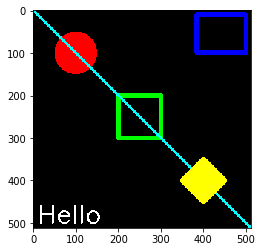

In [49]:
plt.imshow(blank_img)

## Drawing with a mouse

### Drawing dots with mouse clicks

In [31]:
# Blank canvas
img = np.zeros((512, 512, 3))

# define callback function on mouse click event
def draw_circle(event, x, y, flags, param):
    
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(
            img, 
            center=(x, y),
            radius=50,
            color=(255, 0, 255),
            thickness=-1
        )
    elif event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(
            img,
            center=(x, y),
            radius=50,
            color=(0, 255, 255),
            thickness=-1
        )

# set img window context, with the callback
cv2.namedWindow(winname='my_drawing')
cv2.setMouseCallback(
    window_name='my_drawing', 
    on_mouse=draw_circle
)

# loop to show canvas in another window
while True:
    cv2.imshow('my_drawing', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

### Drawing shapes with with mouse drags

In [46]:
# init canvas
img = np.zeros((512, 512, 3))

# Variables
## True while mouse down, else false when up
drawing = False
ix = -1
iy = -1

# Callback func on mouse
def draw_rectangle(event, x, y, flags, param):
    global ix, iy, drawing
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.rectangle(
                img,
                pt1=(ix, iy),
                pt2=(x, y),
                color=(0, 255, 255),
                thickness=-1
            )
    elif event == cv2.EVENT_LBUTTONUP:
        drawing == False
        cv2.rectangle(
            img,
            pt1=(ix, iy),
            pt2=(x, y),
            color=(0, 255, 255),
            thickness=-1
        )
        

# Set imgae window context with callbacks
cv2.namedWindow(winname='my_drawing')
cv2.setMouseCallback(
    window_name='my_drawing',
    on_mouse=draw_rectangle
)

# loop to show window
while True:
    cv2.imshow('my_drawing', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()